In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
data = pd.read_csv('res.csv')
data

,territory,ec_number,participants_number,given_bulletins_number,returned_bulletins_number,invalid_bulletins_number,turnout,yes_votes_total,yes_votes_percentage,no_votes_total,no_votes_percentage
0,Александровская,370,156,98,98,0,63.0,84,85.71,14,14.29
1,Александровская,371,288,175,175,0,61.0,150,85.71,25,14.29
2,Александровская,372,245,130,130,0,53.0,105,80.77,25,19.23
3,Александровская,373,887,339,339,8,38.0,201,59.29,130,38.35
4,Александровская,374,1020,500,500,5,49.0,283,56.60,212,42.40
...,...,...,...,...,...,...,...,...,...,...,...
697,Шегарская,768,959,340,340,1,35.0,226,66.47,113,33.24
698,Шегарская,769,632,340,340,8,54.0,230,67.65,102,30.00
699,Шегарская,770,737,354,354,5,48.0,240,67.80,109,30.79
700,Шегарская,771,573,246,246,3,43.0,167,67.89,76,30.89


In [3]:
data['yes_votes_percentage'] = data['yes_votes_percentage'].astype(float)
data['yes_votes_percentage'] = data['yes_votes_percentage'].div(100)
data['no_votes_percentage'] = data['no_votes_percentage'].astype(float)
data['no_votes_percentage'] = data['no_votes_percentage'].div(100)
data['turnout'] = data['turnout'].astype(float)
data['turnout'] = data['turnout'].div(100)
data[['yes_votes_percentage', 'turnout']]
# data.loc[:, 'yes_votes_percentage':'turnout']

,yes_votes_percentage,turnout
0,0.8571,0.63
1,0.8571,0.61
2,0.8077,0.53
3,0.5929,0.38
4,0.5660,0.49
...,...,...
697,0.6647,0.35
698,0.6765,0.54
699,0.6780,0.48
700,0.6789,0.43


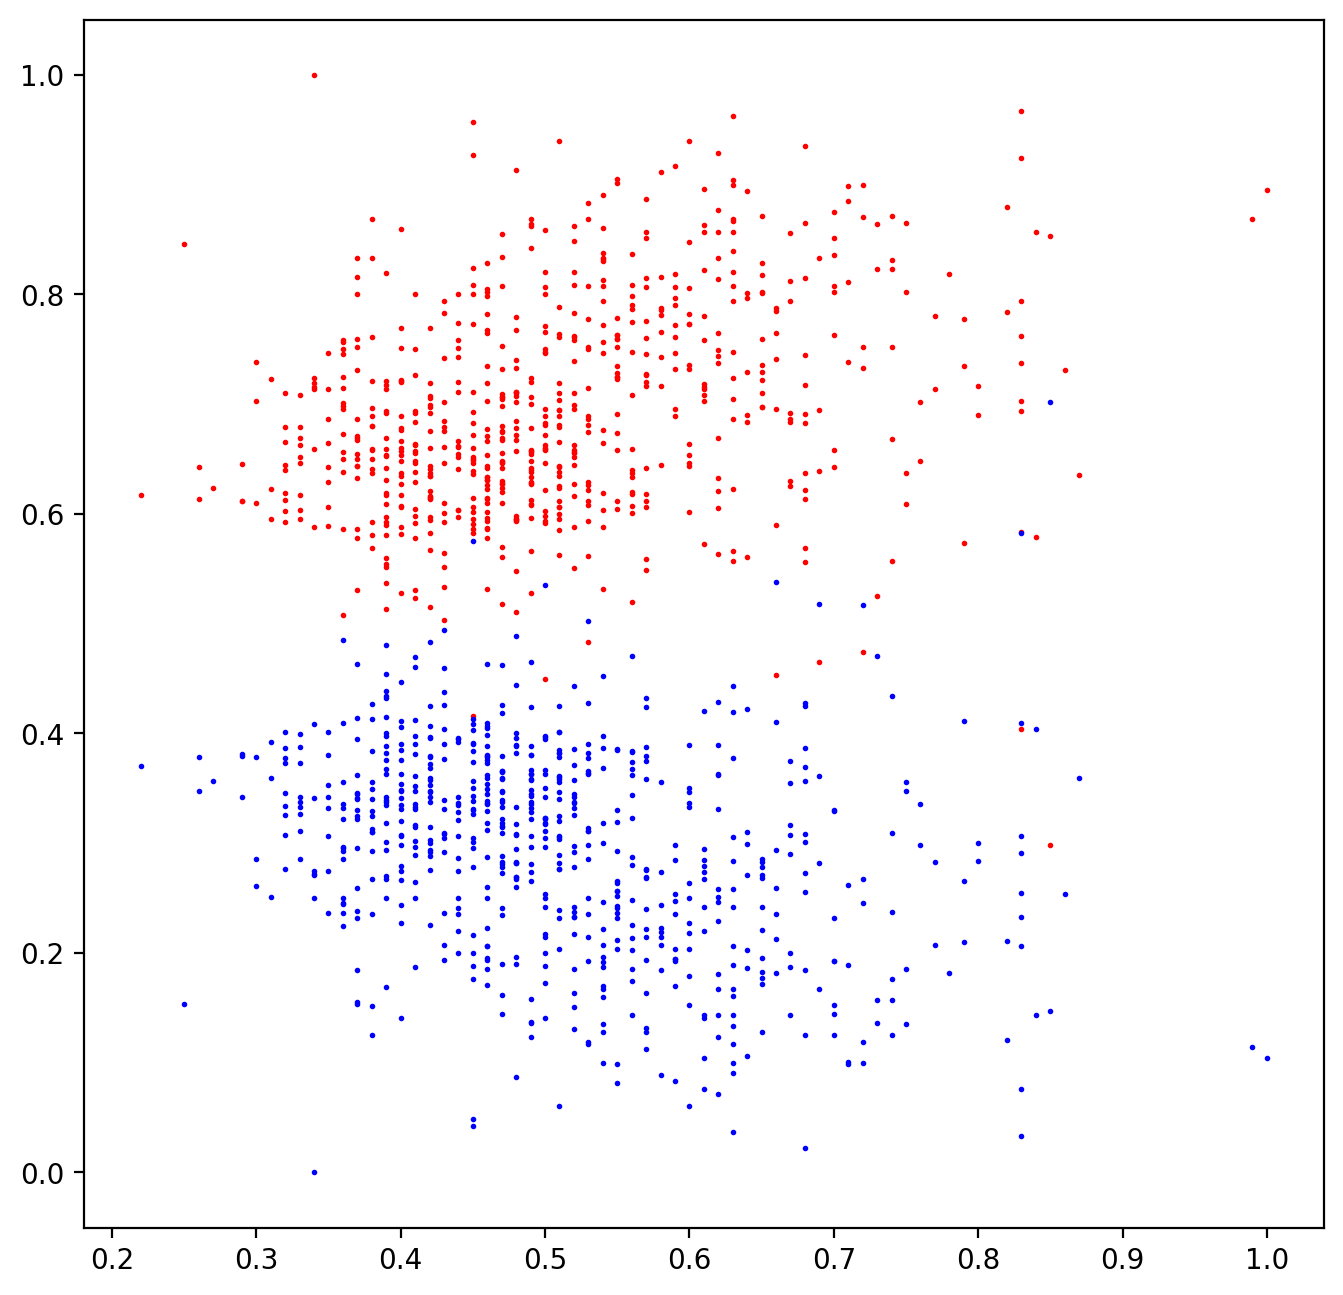

In [19]:
figure(num=None, figsize=(8, 8), dpi=200, facecolor='w', edgecolor='k')
plt.scatter(data['turnout'], data['yes_votes_percentage'], c='r', s=1)
plt.scatter(data['turnout'], data['no_votes_percentage'], c='b', s=1)
plt.show()